In [1]:
from datetime import datetime, timedelta
import pytz
import math
import pylab as plt

import pandas as pd
import numpy as np

import sys
sys.path.append('../data/')
sys.path.append('../view/')

from extractor import WeatherExtractor, Extractor, Period
sampling_interval = '15min'
import tqdm

%matplotlib widget
from plotter import Plot


# TODO: get list of pseudonyms, (valid) dates and reference parameters from Excel file  
homes =  [886307, 873985, 817341]

#location: center of Assendorp neighbourhood in Zwolle
lat, lon = 52.5065500000, 6.0996100000

#timezone: 
timezone_homes = 'Europe/Amsterdam'

# first test just a short timeseries
start = pytz.timezone(timezone_homes).localize(datetime(2021, 12, 20))
end = pytz.timezone(timezone_homes).localize(datetime(2022, 1, 18))

# date and times of seemingly valid periods for short set of 3 
# 886307	2021-12-19 18:55	2022-03-17 09:37
# 873985	2021-12-20 12:54	2022-03-17 17:54
# 817341	2022-01-14 20:27	2022-03-17 18:15

    
# utimately: #min, max dates of the analysis
# start = pytz.timezone(tz_home).localize(datetime(2021,10,21))
# stop = pytz.timezone(tz_home).localize(datetime(2022,5,12)

In [2]:
#check whether the datetime object is properly timezone-aware
start

datetime.datetime(2021, 12, 20, 0, 0, tzinfo=<DstTzInfo 'Europe/Amsterdam' CET+1:00:00 STD>)

In [3]:
#check whether the datetime object is properly timezone-aware
end

datetime.datetime(2022, 1, 18, 0, 0, tzinfo=<DstTzInfo 'Europe/Amsterdam' CET+1:00:00 STD>)

In [4]:
%%time 
# get geospatially interpolated weather from KNMI
# for Twomes, the Weather for all all homes studies can be approached by a single location
# get the dataframe only once for all homes to save time


df_weather = WeatherExtractor.get_interpolated_weather_nl(start, end, lat, lon, timezone_homes, sampling_interval)

Model 2


/home/jovyan/twomes-analysis-pipeline/src/historicdutchweather/historicdutchweather/main.py:67: DtypeWarning: Columns (15,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, comment="#", skiprows=30, skip_blank_lines=True, names=__headerline)
/home/jovyan/twomes-analysis-pipeline/src/historicdutchweather/historicdutchweather/main.py:67: DtypeWarning: Columns (3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, comment="#", skiprows=30, skip_blank_lines=True, names=__headerline)


Got a value error for station 258
Will skip for now


/home/jovyan/twomes-analysis-pipeline/src/historicdutchweather/historicdutchweather/main.py:67: DtypeWarning: Columns (3,15,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, comment="#", skiprows=30, skip_blank_lines=True, names=__headerline)


Got a value error for station 275
Will skip for now


100% 696/696 [00:09<00:00, 70.99it/s]


Resampling weather data...
CPU times: user 12.4 s, sys: 657 ms, total: 13.1 s
Wall time: 14.5 s


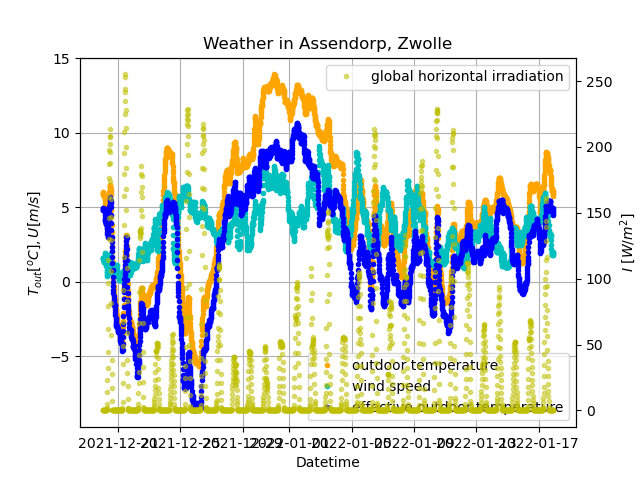

In [5]:
# plot temperature data

Plot.weather_and_other_temperatures('Weather in Assendorp, Zwolle', df_weather)

# N.B. The resulting figure below can be manipulated interactively; hover with mouse for tips & tricks

In [6]:
# get interpolated data from the Twomes database and combine with weather data already obtained
df_data_homes = Extractor.get_interpolated_twomes_data(homes, start, end, timezone_homes, sampling_interval, df_weather)

Retrieving data for pseudonyms...


100% 3/3 [03:35<00:00, 71.72s/it]


In [15]:
#what the data looks like
df_data_homes

,homepseudonym,heartbeat,outdoor_temp_degC,windspeed_m_per_s,effective_outdoor_temp_degC,hor_irradiation_J_per_h_per_cm^2,hor_irradiation_W_per_m^2,indoor_temp_degC,indoor_temp_degC_CO2,indoor_setpoint_temp_degC,gas_m^3,e_used_normal_kWh,e_used_low_kWh,e_returned_normal_kWh,e_returned_low_kWh,timedelta,timedelta_s,e_used_net_kWh,e_remaining_heat_kWh,daycompleteness
2021-12-20 00:00:00+01:00,886307,NaN,6.021051,1.604638,4.951292,-1.976263e-323,-5.434722e-323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:15:00,900.0,NaN,NaN,NaN
2021-12-20 00:15:00+01:00,886307,NaN,5.981809,1.604638,4.912050,-1.976263e-323,-5.434722e-323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:15:00,900.0,NaN,NaN,NaN
2021-12-20 00:30:00+01:00,886307,NaN,5.942567,1.604638,4.872808,-1.976263e-323,-5.434722e-323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:15:00,900.0,NaN,NaN,NaN
2021-12-20 00:45:00+01:00,886307,NaN,5.903324,1.604638,4.833566,-1.976263e-323,-5.434722e-323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:15:00,900.0,NaN,NaN,NaN
2021-12-20 01:00:00+01:00,886307,2.0,5.868830,1.583000,4.813496,-1.976263e-323,-5.434722e-323,16.746667,72.000000,12.5,0.00,0.0,0.001,0.0,0.0,0 days 00:15:00,900.0,0.001,0.001,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-17 23:45:00+01:00,817341,3.0,NaN,NaN,NaN,NaN,NaN,18.630000,63.700000,15.0,0.01,0.0,0.005,0.0,0.0,0 days 00:15:00,900.0,0.005,0.005,1.000000
2022-01-18 00:00:00+01:00,817341,3.0,NaN,NaN,NaN,NaN,NaN,18.583333,63.933333,15.0,0.00,0.0,0.001,0.0,0.0,0 days 00:15:00,900.0,0.001,0.001,1.000000
2022-01-18 00:15:00+01:00,817341,3.0,NaN,NaN,NaN,NaN,NaN,18.576667,64.066667,15.0,0.00,0.0,0.006,0.0,0.0,0 days 00:15:00,900.0,0.006,0.006,1.000000
2022-01-18 00:30:00+01:00,817341,3.0,NaN,NaN,NaN,NaN,NaN,18.563333,64.400000,15.0,0.00,0.0,0.000,0.0,0.0,0 days 00:15:00,900.0,0.000,0.000,1.000000


In [16]:
# how to select data from a single home
df_data_homes[df_data_homes['homepseudonym'] == 817341]

,homepseudonym,heartbeat,outdoor_temp_degC,windspeed_m_per_s,effective_outdoor_temp_degC,hor_irradiation_J_per_h_per_cm^2,hor_irradiation_W_per_m^2,indoor_temp_degC,indoor_temp_degC_CO2,indoor_setpoint_temp_degC,gas_m^3,e_used_normal_kWh,e_used_low_kWh,e_returned_normal_kWh,e_returned_low_kWh,timedelta,timedelta_s,e_used_net_kWh,e_remaining_heat_kWh,daycompleteness
2021-12-20 00:00:00+01:00,817341,NaN,6.021051,1.604638,4.951292,-1.976263e-323,-5.434722e-323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:15:00,900.0,NaN,NaN,NaN
2021-12-20 00:15:00+01:00,817341,NaN,5.981809,1.604638,4.912050,-1.976263e-323,-5.434722e-323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:15:00,900.0,NaN,NaN,NaN
2021-12-20 00:30:00+01:00,817341,NaN,5.942567,1.604638,4.872808,-1.976263e-323,-5.434722e-323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:15:00,900.0,NaN,NaN,NaN
2021-12-20 00:45:00+01:00,817341,NaN,5.903324,1.604638,4.833566,-1.976263e-323,-5.434722e-323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:15:00,900.0,NaN,NaN,NaN
2021-12-20 01:00:00+01:00,817341,2.0,5.868830,1.583000,4.813496,-1.976263e-323,-5.434722e-323,18.300000,68.800000,NaN,0.00,0.0,0.002,0.0,0.0,0 days 00:15:00,900.0,0.002,0.002,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-17 23:45:00+01:00,817341,3.0,NaN,NaN,NaN,NaN,NaN,18.630000,63.700000,15.0,0.01,0.0,0.005,0.0,0.0,0 days 00:15:00,900.0,0.005,0.005,1.000000
2022-01-18 00:00:00+01:00,817341,3.0,NaN,NaN,NaN,NaN,NaN,18.583333,63.933333,15.0,0.00,0.0,0.001,0.0,0.0,0 days 00:15:00,900.0,0.001,0.001,1.000000
2022-01-18 00:15:00+01:00,817341,3.0,NaN,NaN,NaN,NaN,NaN,18.576667,64.066667,15.0,0.00,0.0,0.006,0.0,0.0,0 days 00:15:00,900.0,0.006,0.006,1.000000
2022-01-18 00:30:00+01:00,817341,3.0,NaN,NaN,NaN,NaN,NaN,18.563333,64.400000,15.0,0.00,0.0,0.000,0.0,0.0,0 days 00:15:00,900.0,0.000,0.000,1.000000


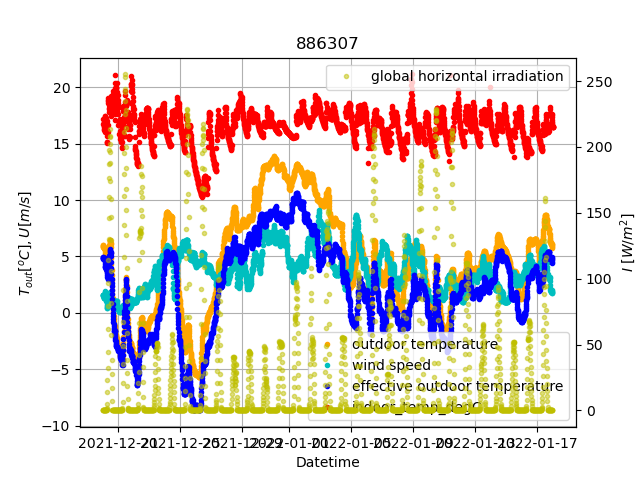

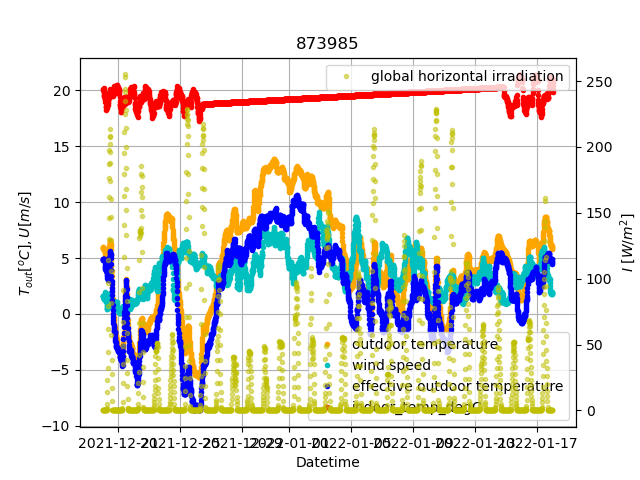

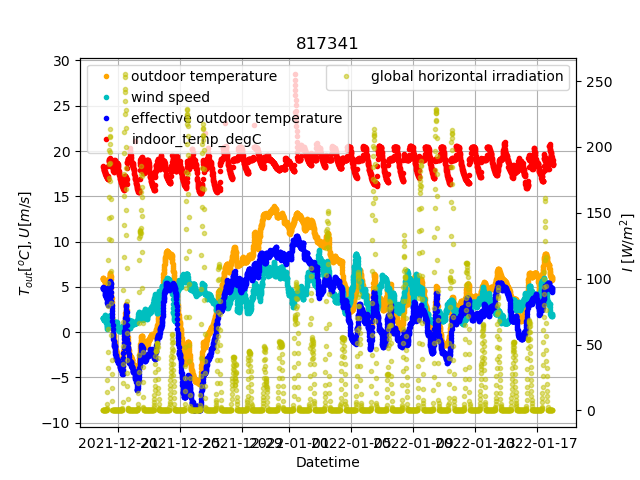

In [17]:
# plot temperature data of oll homes in a list 

for home_id in homes:
    df_data_one_home = df_data_homes[df_data_homes['homepseudonym'] == home_id]
    Plot.weather_and_other_temperatures(home_id, df_data_one_home, ['indoor_temp_degC'])

# N.B. The resulting figure below can be manipulated interactively; hover with mouse for tips & tricks


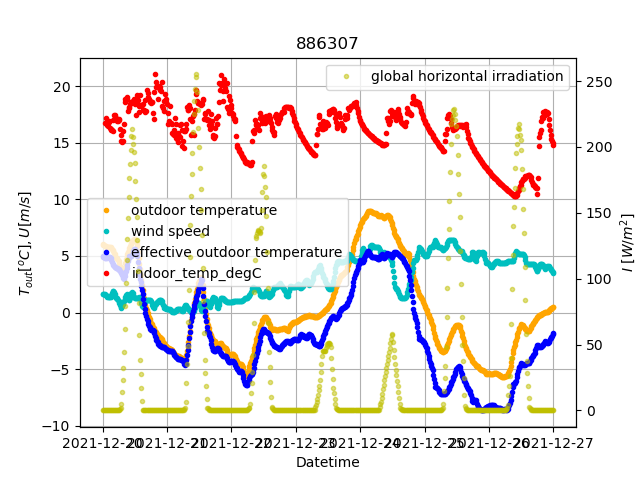

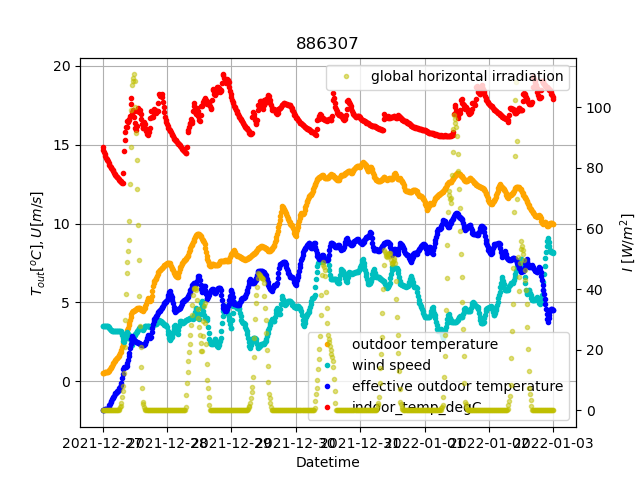

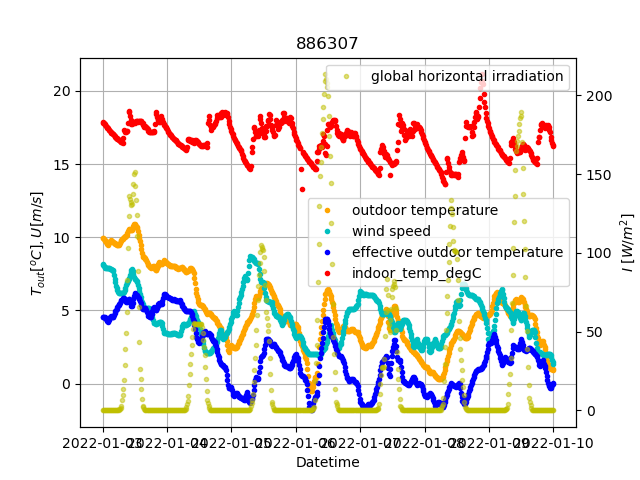

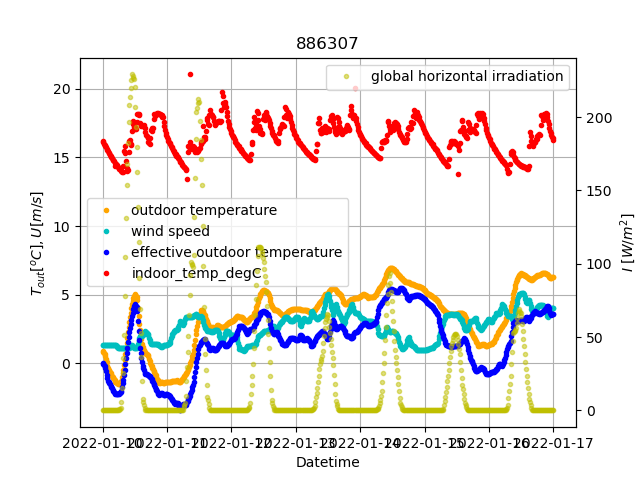

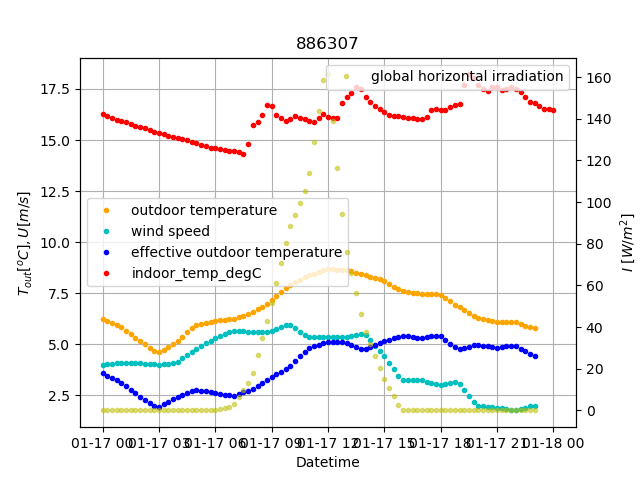

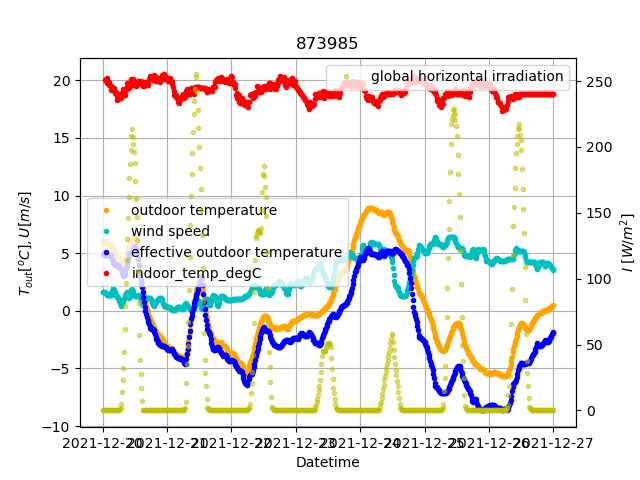

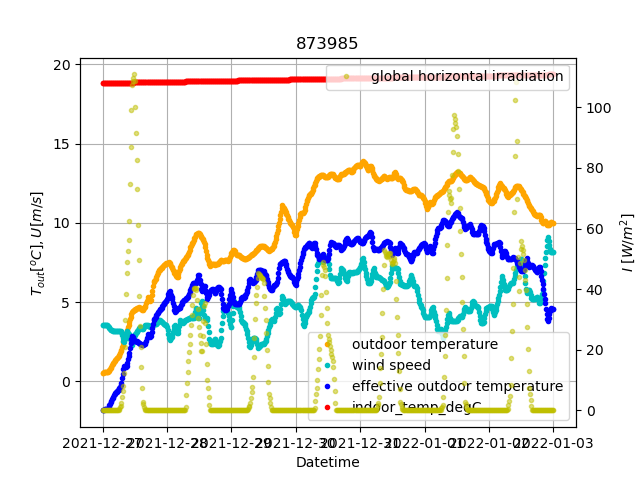

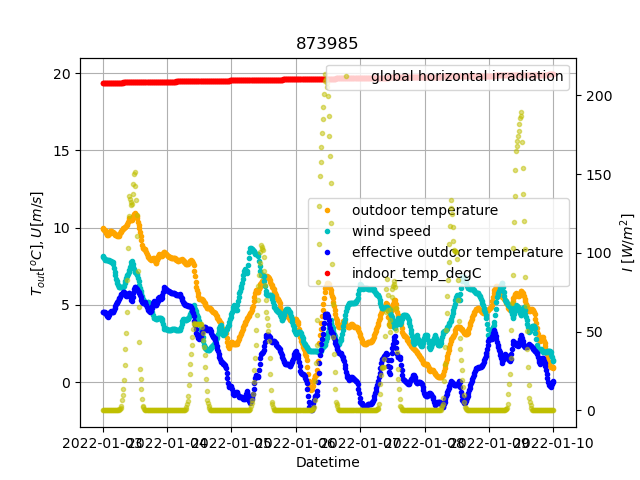

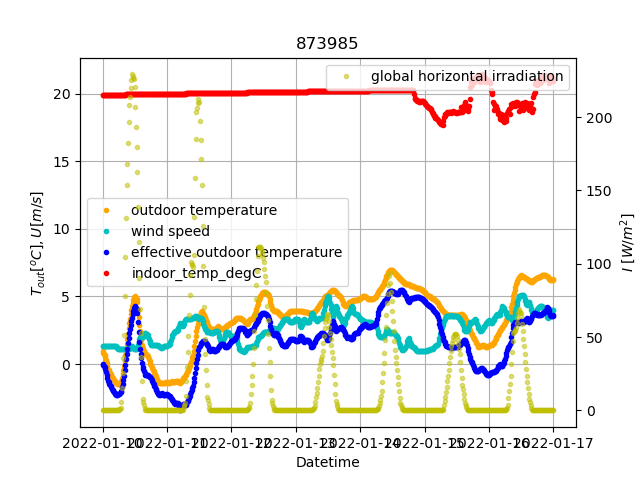

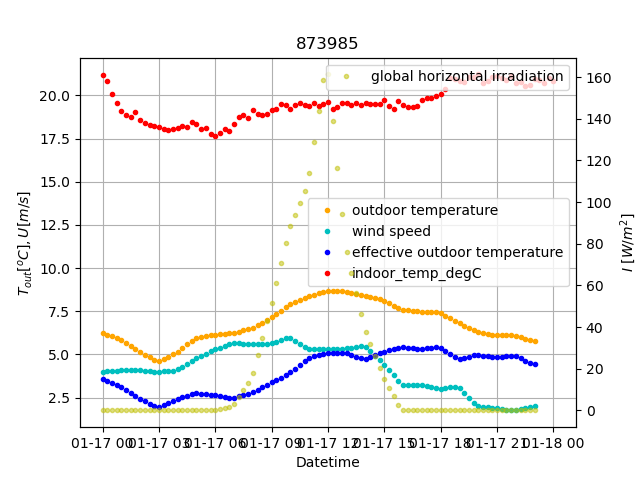

In [ ]:
#plot se series of weeks for all homes
plt.ioff()

for home_id in homes:
    df_data_one_home = df_data_homes[df_data_homes['homepseudonym'] == home_id]
    for moving_horizon_start in pd.date_range(start=start, end=end, freq='7D'):
        moving_horizon_end = min(end, moving_horizon_start + timedelta(days=7))
        df_moving_horizon = df_data_one_home[moving_horizon_start:moving_horizon_end]
        Plot.weather_and_other_temperatures(home_id, df_moving_horizon, ['indoor_temp_degC'])

plt.ion()  
    

In [12]:
from gekko import GEKKO

moving_horizon_duradion_d = 7
daterange_frequency = '7D'

df_results = pd.DataFrame()
# Create a header  row
df_header_row = pd.DataFrame(
    {'pseudonym',
     'start_date',
     'end_date',
     'H_W_per_K',
     'tau_h',
     'eta_hs',
     'A_m^2'}
)
df_results = pd.concat([df_results, df_header_row])

for home_id in tqdm.tqdm(homes):
    
    moving_horizon_starts = pd.date_range(start=start, end=end, freq=daterange_frequency)
    # moving_horizon_ends = moving_horizon_starts.shift(1,freq=daterange_frequency)

    for moving_horizon_start in tqdm.tqdm(moving_horizon_starts):

        moving_horizon_end = min(end, moving_horizon_start + timedelta(days=moving_horizon_duradion_d))
        df_moving_horizon = df_data_one_home[moving_horizon_start:moving_horizon_end]

        start_point = moving_horizon_start
        end_point = moving_horizon_end

        delta_t = df_moving_horizon['timedelta_s'].mean()

        # data loading
        setpoint = np.asarray(df_moving_horizon['indoor_setpoint_temp_degC'])
        T_in_meas = np.asarray(df_moving_horizon['indoor_temp_degC'])
        T_out_eff_arr = np.asarray(df_moving_horizon['effective_outdoor_temp_degC'])
        T_out = np.asarray(df_moving_horizon['outdoor_temp_degC'])

        gas_total = np.asarray(df_moving_horizon['gas_m^3'])

        e_used_normal_val = np.asarray(df_moving_horizon['e_used_normal_kWh'])
        e_used_low_val = np.asarray(df_moving_horizon['e_used_low_kWh'])

        e_returned_normal_val = np.asarray(df_moving_horizon['e_returned_normal_kWh'])
        e_returned_low_val = np.asarray(df_moving_horizon['e_returned_low_kWh'])

        delta_E_supply_val = np.asarray(e_used_normal_val + e_used_low_val)

        delta_E_PV_val = 0

        delta_E_ret_val = np.asarray(e_returned_normal_val + e_returned_low_val)
        delta_EV_charge_val = 0

        delta_E_CH_val = 0


        delta_E_int_val = np.asarray(
            (delta_E_supply_val + delta_E_PV_val - delta_E_ret_val - delta_EV_charge_val - delta_E_CH_val) / delta_t)   # [kWh/s]
        delta_Q_int_e_val = np.asarray(delta_E_int_val * 1000 * 60 * 60)    # [W]
        I_geo_eff_val = np.asarray(df_moving_horizon['hor_irradiation_W_per_m^2'])

        ########################################################################################################################
        #                                                   tau initial values input
        ########################################################################################################################
        # tau Input: the following value should be based on hour for tau [hr]
        tau_init_val_hr = 100
        tau_lb_hr = 10
        tau_ub_hr = 1000

        # Internal conversion (do not change this part)
        tau_init_val = tau_init_val_hr * 3600
        tau_lb = tau_lb_hr * 3600
        tau_ub = tau_ub_hr * 3600

        ########################################################################################################################
        #                                                   Gekko Model - Initialize
        ########################################################################################################################
        # initialize gekko
        m = GEKKO(remote=False)
        m.time = np.linspace(delta_t, len(T_in_meas) * delta_t, len(T_in_meas))  # [s]

        ########################################################################################################################
        #                                                   Gekko Model - Variables
        ########################################################################################################################
        """"
        Model parameter:
        tau [hr]: effective thermal inertia
        eta_hs_CH [-]: upper heating efficiency of the central heating system
        COP_CH [-]: Coef. of Performance for heat pump
        H [W/K]: specific heat loss
        A_eff [m^2]: Effective area of the imaginary solar aperture in the horizontal plane
        """
        tau = m.FV(value=tau_init_val, lb=tau_lb, ub=tau_ub);
        tau.STATUS = 1;
        tau.FSTATUS = 0;  # tau.DMAX = 10
        H = m.FV(value=300.0, lb=0, ub=1000);
        H.STATUS = 1;
        H.FSTATUS = 0;  # H.DMAX=50                #[W/K]
        # eta_hs_CH = m.FV(value=0.8, lb=0, ub=1.0); eta_hs_CH.STATUS = 1; eta_hs_CH.FSTATUS = 0;  # eta_hs_CH.DMAX = 0.25
        # COP_CH = m.FV(value=1, lb=0.1, ub=7) ; COP_CH.STATUS = 1 ; COP_CH.FSTATUS = 0 ; #COP_CH.DMAX=1
        A_eff = m.FV(value=5, lb=1, ub=100) ; A_eff.STATUS = 1 ; A_eff.FSTATUS = 0            #[m^2]

        """"
        Constant parameter:
        h_E [J/kWh]: Convertion factor ( [kWh] to [J] ) = 1000 * 60 * 60

        h_sup [J/Nm^3]: superior calorific value of natural gas from the Groningen field = 35,170,000.00
        eta_hs_noCH [-]: upper efficiency of heating the home indirectly using gas, for other primary purposes than heating the home

        delta_Q_sol [J/s]: heat gain from solar irradiation
        delta_G_noCH [Nm^3/s]: the natural gas used for other purposes than central heating
        delta_Q_int_gas_noCH [J/s]: natural gas used for central heating

        delta_Q_int_occup [W]: internal heat gain from occupants
        delta_Q_int_occup [W] = Np * Q_int_person_avg [W]
        Np [-]: number of persons in the household living in the home
        Q_int_person_avg [W]: internal heat gain from persons
        """
        h_E = m.Param(value=60 * 60 * 1000)  # [J/kWh"], the conversion factor [kWh] to [J]
        h_sup = m.Param(value=35170000.0)  # [J/Nm^3] "superior calorific value of natural gas from the Groningen field"
        eta_hs_noCH = m.Param(value=0.34)  # eq48. and PowerPoint Slide 24 (Effective upper home for indirect heating eff.)

        eta_hs_CH = m.Param(value=0.9)
        COP_CH = m.Param(value=4)
        # A_eff = m.Param(value=6)

        delta_G_noCH = m.Param(value=339.0 / (365.25 * 24 * 60 * 60))  # [Nm^3/s]
        delta_Q_int_gas_noCH = m.Param(value=delta_G_noCH * eta_hs_noCH * h_sup)  # [W]=[J/s]

        Np = m.Param(value=2.2)  # average number of people in Dutch household
        Q_int_person_avg = m.Param(value=61)  # [J/s] average heat gain for each average person with average behaviour
        delta_Q_int_occup = m.Param(value=Np * Q_int_person_avg)  # [J/s]

        """"
        Manipulated parameter:
        delta_Q_int_e [J/s]: internal heat gain from internally used electricity
        delta_Q_int_e [J/s] = delta_E_int [kWh/s] * hE [J/kWh]
        T_out_eff [K]: effective outdoor temperature
        delta_E_CH [kWh]: Electricity used for heat pump
        delta_G [Nm3/s] = Natural gas supplied to the home via the natural gas net
        I_geo_eff [W/m^2] = geospatially interpolated global horizontal irradiation
        """
        delta_Q_int_e = m.MV(value=delta_Q_int_e_val);
        delta_Q_int_e.STATUS = 0;
        delta_Q_int_e.FSTATUS = 1  # [J/s]
        T_out_eff = m.MV(value=T_out_eff_arr);
        T_out_eff.STATUS = 0;
        T_out_eff.FSTATUS = 1  # [K]
        delta_E_CH = m.MV(value=delta_E_CH_val / delta_t);
        delta_E_CH.STATUS = 0;
        delta_E_CH.FSTATUS = 1  # [kWh/s]
        delta_G = m.MV(value=gas_total / delta_t);
        delta_G.STATUS = 0;
        delta_G.FSTATUS = 1  # [Nm^3/s]
        I_geo_eff = m.MV(value=I_geo_eff_val);
        I_geo_eff.STATUS = 0;
        I_geo_eff.FSTATUS = 1

        """"
        Control variable:
        T_in_sim [K]: Indoor temperature
        """
        T_in_sim = m.CV(value=T_in_meas);
        T_in_sim.STATUS = 1;
        T_in_sim.FSTATUS = 1;  # T_in_sim.MEAS_GAP= 0.25

        ########################################################################################################################
        #                                               Gekko - Equations
        ########################################################################################################################
        """
        delta_Q_gain [J/s]= delta_Q_CH [J/s] + delta_Q_int [J/s] + delta_Q_sol [J/s]
        delta_Q_gain [J/s]= Heat gain
        delta_Q_CH [J/s]= Heat gain from central hearting
        delta_Q_int [J/s]= Heat gain from internal devices
        delta_Q_sol [J/s]= delta_Q_int from solar irradiation
        """

        ########################################################################################################################
        #                                               Equation - delta_Q_CH
        ########################################################################################################################
        """"
        delta_Q_CH [J/s] = (delta_G_CH [Nm3/s] * eta_hs_ch [-] * h_sup [J/Nm3]) + (delta_E_CH [kWh/s] * COP_CH [-] * hE [J/kWh])
        delta_G_CH [Nm3/s] = Natural gas used for central heating
        delta_G_CH [Nm3/s] = delta_G [Nm3/s]- delta_G_noCH [Nm3/s]
        """

        delta_G_CH = m.Intermediate(delta_G - delta_G_noCH)  # [Nm3/s]
        delta_Q_CH = m.Intermediate((delta_G_CH * eta_hs_CH * h_sup) + (delta_E_CH * COP_CH * h_E))  # [J/s]
        # delta_Q_CH = m.Intermediate((delta_Q_CH * eta_hs_CH * h_sup) + (delta_E_CH * COP_CH * h_E))  # [J/s]
        ########################################################################################################################
        #                                                   Equation - delta_Q_int
        ########################################################################################################################
        """"
        delta_Q_int [J/s]: total internal heat
        delta_Q_int [J/s]= delta_Q_int_e + delta_Q_int_occup + delta_Q_int_gas_noCH
        delta_E_int [kWh/s] = delta_E_supply [kWh/s] + delta_E_PV [kWh/s] - delta_E_ret [kWh/s] - delta_E_EVcharge [kWh/s]
        """
        delta_Q_int = m.Intermediate(delta_Q_int_e + delta_Q_int_occup + delta_Q_int_gas_noCH)  # [J/s]

        ########################################################################################################################
        #                                                   Equation - delta_Q_sol
        ########################################################################################################################
        delta_Q_sol = m.Intermediate(A_eff * I_geo_eff)  # [J/s]

        ########################################################################################################################
        #                                                    Equation - delta_Q_gain
        ########################################################################################################################
        delta_Q_gain = m.Intermediate(delta_Q_CH + delta_Q_sol + delta_Q_int)  # [J/s]

        ########################################################################################################################
        #                                                   Final Equations
        ########################################################################################################################
        C_eff = m.Intermediate(H * tau)
        m.Equation(T_in_sim.dt() == (delta_Q_gain - (H * (T_in_sim - T_out_eff))) / C_eff)

        ########################################################################################################################
        #                                                    Solve Equations
        ########################################################################################################################
        m.options.IMODE = 5
        m.options.EV_TYPE = 1  # specific objective function (L1-norm vs L2-norm)
        m.options.NODES = 2
        # m.options.CV_TYPE = 2
        # add dead-band for measurement to avoid overfitting
        # T_in_sim.MEAS_GAP = 0.25
        m.solve(disp=False)

        ########################################################################################################################
        #                                                       Result
        ########################################################################################################################
        print(
            "Start point: {} ====> End point: {}".format(start_point, end_point))
        print('effective thermal inertia: tau [hr]: ' + str(round(tau.value[0] / 3600, 2)))
        # print('upper heating efficiency of the central heating system: eta_hs [-]: ' + str(round(eta_hs_CH.value[0], 2)))
        # print('Coef. of Performance for heat pump: COP_CH [-]: ' + str(round(COP_CH.value[0], 2)))
        print('specific heat loss: H [W/K]: ' + str(round(H.value[0], 2)))
        print('Effective area of solar aperture in the horizontal plane: A_eff [m^2]: ' + str(round(A_eff.value[0], 2)))
        print('*' * 50)

        
        
        # Create a results row
        df_result_row = pd.DataFrame(
            {home_id,
             start_point,
             start_point,
             round(H.value[0], 2),
             round(tau.value[0] / 3600, 2),
             round(eta_hs_CH.value[0], 2),
             A_eff.value[0]}
        )
        df_result = pd.concat([df_result, df_result_row])

df_results.tz_localize(None).to_excel('result.xlsx')


  0% 0/3 [00:00<?, ?it/s]
  0% 0/5 [05:46<?, ?it/s]
  0% 0/3 [05:46<?, ?it/s]


Exception: @error: Solution Not Found
